In [94]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Paths
wav_dir = "genres_original"  # Replace with the path to your .wav files
output_dir = "images_original"

# Create output directory if not exists
os.makedirs(output_dir, exist_ok=True)

# Function to create Mel Spectrogram
def create_mel_spectrogram(file_path, output_file):
    y, sr = librosa.load(file_path, duration=30)
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Save the spectrogram as an image
    plt.figure(figsize=(4, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, hop_length=512, fmax=8000, cmap='viridis')
    plt.axis('off')  # Remove axes
    plt.tight_layout()
    plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
    plt.close()

# Process all files
for genre in os.listdir(wav_dir):
    genre_dir = os.path.join(wav_dir, genre)
    if os.path.isdir(genre_dir):
        output_genre_dir = os.path.join(output_dir, genre)
        os.makedirs(output_genre_dir, exist_ok=True)

        for file in os.listdir(genre_dir):
            if file.endswith(".wav"):
                file_path = os.path.join(genre_dir, file)
                output_file = os.path.join(output_genre_dir, file.replace(".wav", ".png"))
                create_mel_spectrogram(file_path, output_file)


In [95]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
image_dir = "images_original"
train_dir = "train_data"
val_dir = "val_data"

# Create train and validation directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Split dataset
for genre in os.listdir(image_dir):
    genre_dir = os.path.join(image_dir, genre)
    if os.path.isdir(genre_dir):
        files = [os.path.join(genre_dir, f) for f in os.listdir(genre_dir) if f.endswith(".png")]
        train_files, val_files = train_test_split(files, test_size=0.2, random_state=42)

        # Create genre directories in train and validation folders
        train_genre_dir = os.path.join(train_dir, genre)
        val_genre_dir = os.path.join(val_dir, genre)
        os.makedirs(train_genre_dir, exist_ok=True)
        os.makedirs(val_genre_dir, exist_ok=True)

        # Copy files to their respective directories
        for f in train_files:
            shutil.copy(f, train_genre_dir)
        for f in val_files:
            shutil.copy(f, val_genre_dir)

In [96]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Paths
train_path = "train_data"
val_path = "val_data"

# Data generators
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    val_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 genres
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50
)

# Save the model
model.save("music_genre_classifier.h5")

Found 799 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


C:\Users\hylmi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


C:\Users\hylmi\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.0836 - loss: 2.3586 - val_accuracy: 0.1800 - val_loss: 2.2419
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.1833 - loss: 2.2168 - val_accuracy: 0.2300 - val_loss: 2.1203
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.1943 - loss: 2.1349 - val_accuracy: 0.2350 - val_loss: 2.0254
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.1816 - loss: 2.0858 - val_accuracy: 0.2950 - val_loss: 1.9319
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.2225 - loss: 2.0176 - val_accuracy: 0.2150 - val_loss: 2.0013
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.2522 - loss: 2.0322 - val_accuracy: 0.3500 - val_loss: 1.9248
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.3120 - loss: 1.8996 - val_accuracy: 0.3750 - val_loss: 1.8591
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.3099 - loss: 1.8724 - val_accuracy: 0.3950 - val_

In [97]:
# Evaluate model
val_loss, val_accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5005 - loss: 3.0510 
Validation Loss: 2.7017
Validation Accuracy: 0.5350


In [98]:
import numpy as np

# Get predictions and true labels
val_gen.reset()  # Ensure generator starts from the beginning
predictions = model.predict(val_gen)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_gen.classes  # True labels
class_labels = list(val_gen.class_indices.keys())  # Genre labels

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


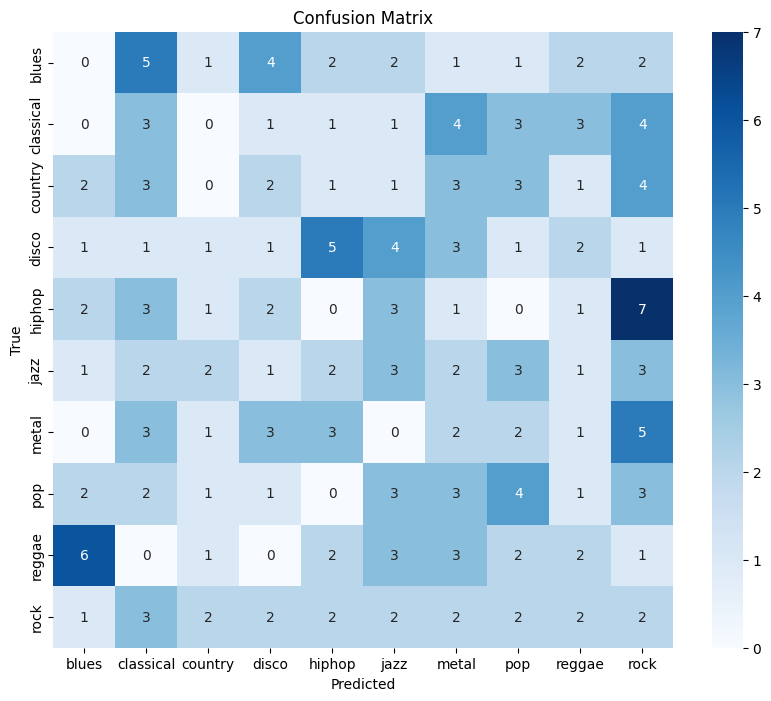

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [100]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        20
   classical       0.12      0.15      0.13        20
     country       0.00      0.00      0.00        20
       disco       0.06      0.05      0.05        20
      hiphop       0.00      0.00      0.00        20
        jazz       0.14      0.15      0.14        20
       metal       0.08      0.10      0.09        20
         pop       0.19      0.20      0.20        20
      reggae       0.12      0.10      0.11        20
        rock       0.06      0.10      0.08        20

    accuracy                           0.09       200
   macro avg       0.08      0.09      0.08       200
weighted avg       0.08      0.09      0.08       200



In [101]:
# Per-class accuracy
class_correct = np.zeros(len(class_labels))
class_total = np.zeros(len(class_labels))

for i, label in enumerate(true_classes):
    class_total[label] += 1
    if predicted_classes[i] == label:
        class_correct[label] += 1

for i, genre in enumerate(class_labels):
    accuracy = class_correct[i] / class_total[i] if class_total[i] > 0 else 0
    print(f"{genre}: Accuracy = {accuracy:.4f}")

blues: Accuracy = 0.0000
classical: Accuracy = 0.1500
country: Accuracy = 0.0000
disco: Accuracy = 0.0500
hiphop: Accuracy = 0.0000
jazz: Accuracy = 0.1500
metal: Accuracy = 0.1000
pop: Accuracy = 0.2000
reggae: Accuracy = 0.1000
rock: Accuracy = 0.1000


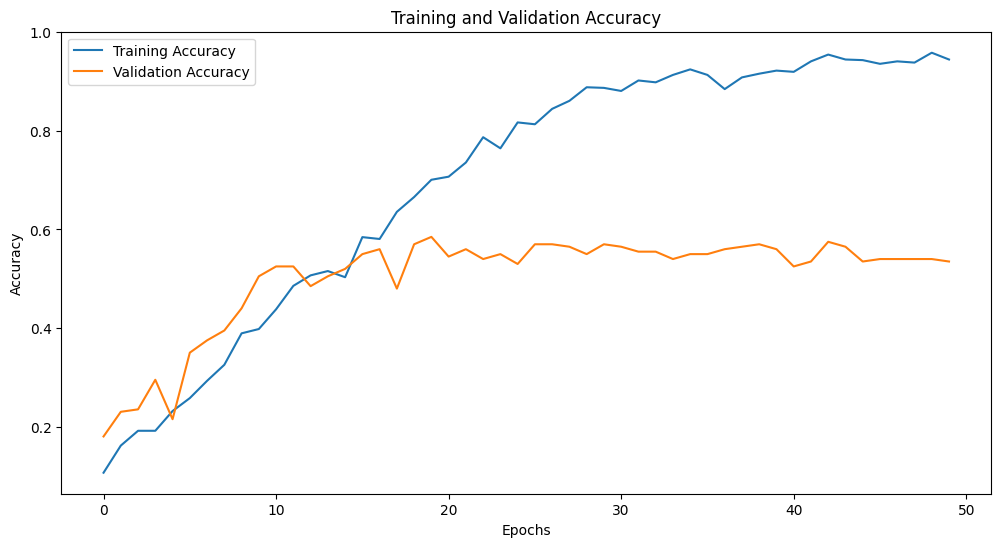

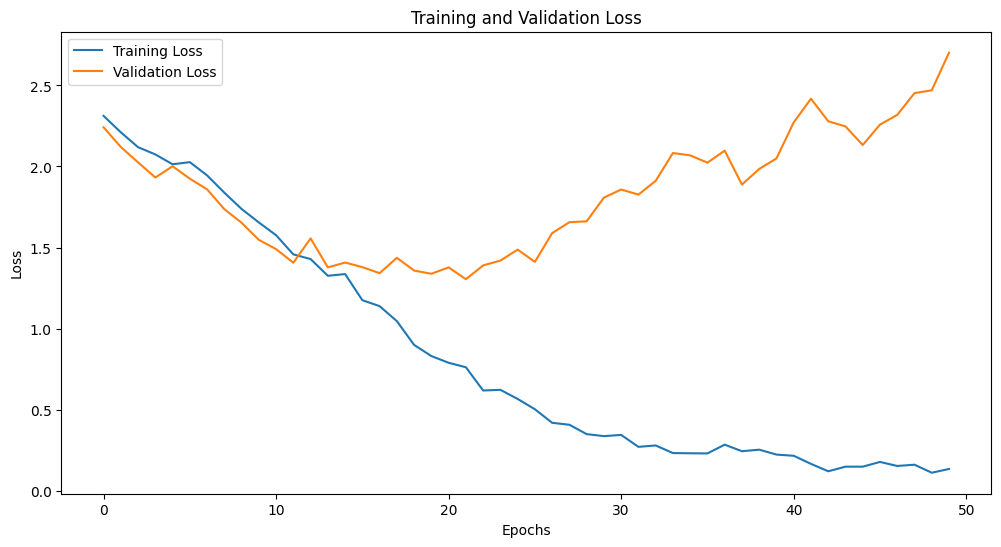

In [102]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [103]:
import librosa
import librosa.display
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

# Function to generate a Mel spectrogram
def generate_spectrogram(audio_path, output_image_size=(256, 256)):
    # Load audio
    y, sr = librosa.load(audio_path, duration=30)  # Load 30 seconds of audio
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256, fmax=8000)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Plot and save the spectrogram
    fig, ax = plt.subplots(figsize=(4, 4), dpi=32)  # To match 128x128 size
    ax.axis('off')
    librosa.display.specshow(spectrogram_db, sr=sr, hop_length=512, fmax=8000, cmap='viridis')
    fig.tight_layout(pad=0)
    fig.canvas.draw()

    # Convert plot to image array
    spectrogram_image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    spectrogram_image = spectrogram_image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)

    # Resize to the required dimensions
    spectrogram_image = tf.image.resize(spectrogram_image, output_image_size).numpy()
    spectrogram_image = spectrogram_image / 255.0  # Normalize

    return spectrogram_image

In [104]:
def predict_genre(model, file_path):
    # Generate a spectrogram
    temp_image = "temp.png"
    create_mel_spectrogram(file_path, temp_image)
    
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(temp_image, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    genre_idx = tf.argmax(predictions[0]).numpy()
    genres = train_gen.class_indices
    genres = {v: k for k, v in genres.items()}  # Reverse mapping
    return genres[genre_idx]

# Example usage
new_audio_file = "genres_original/rock/rock.00088.wav"  # Replace with the path to your .wav file
model = tf.keras.models.load_model("music_genre_classifier.h5")
predicted_genre = predict_genre(model, new_audio_file)
print(f"Predicted Genre: {predicted_genre}")

# Example usage
new_audio_file = "genres_original/metal/metal.00093.wav"  # Replace with the path to your .wav file
model = tf.keras.models.load_model("music_genre_classifier.h5")
predicted_genre = predict_genre(model, new_audio_file)
print(f"Predicted Genre: {predicted_genre}")

# Example usage
new_audio_file = "genres_original/jazz/jazz.00097.wav"  # Replace with the path to your .wav file
model = tf.keras.models.load_model("music_genre_classifier.h5")
predicted_genre = predict_genre(model, new_audio_file)
print(f"Predicted Genre: {predicted_genre}")

# Example usage
new_audio_file = "Energetic Rock (30 sec) - Royalty-Free Background Music ｜ Cinematic.wav"  # Replace with the path to your .wav file
model = tf.keras.models.load_model("music_genre_classifier.h5")
predicted_genre = predict_genre(model, new_audio_file)
print(f"Predicted Genre: {predicted_genre}")

# Example usage
new_audio_file = "Lying From You - Linkin Park (Meteora).wav"  # Replace with the path to your .wav file
model = tf.keras.models.load_model("music_genre_classifier.h5")
predicted_genre = predict_genre(model, new_audio_file)
print(f"Predicted Genre: {predicted_genre}")

# Example usage
new_audio_file = "Scenery.wav"  # Replace with the path to your .wav file
model = tf.keras.models.load_model("music_genre_classifier.h5")
predicted_genre = predict_genre(model, new_audio_file)
print(f"Predicted Genre: {predicted_genre}")

# Example usage
new_audio_file = "ブリーズ.wav"  # Replace with the path to your .wav file
model = tf.keras.models.load_model("music_genre_classifier.h5")
predicted_genre = predict_genre(model, new_audio_file)
print(f"Predicted Genre: {predicted_genre}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Predicted Genre: rock
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Predicted Genre: metal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Predicted Genre: jazz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Predicted Genre: metal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Predicted Genre: metal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Predicted Genre: jazz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted Genre: blues
